## Pluggable compilation with Qiskit

https://qiskit.github.io/ecosystem/#transpiler_plugin

This notebook illustrates the pluggability of the Qiskit transpiler. A call to the transpiler consists of running a pipeline of passes (even sometimes a repetition of some parts of the pipeline until some condition is met). Developers and researchers can plug into any part of this flow to reconfigure the transpilation. This allows for testing of new ideas, benchmarking of different techniques, and task-specific compilations.

In [1]:
from qiskit.transpiler.preset_passmanagers.plugin import list_stage_plugins
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.compiler import transpile

from qiskit.circuit.random import random_circuit
from qiskit_ibm_runtime.fake_provider import FakeVigoV2

In [2]:
backend = FakeVigoV2()
circuit = random_circuit(3, 4, seed=42)

In [3]:
list_stage_plugins('routing')

['dsm',
 'hamiltonian_simulation',
 'rustiq',
 'basic',
 'lookahead',
 'none',
 'sabre',
 'stochastic']

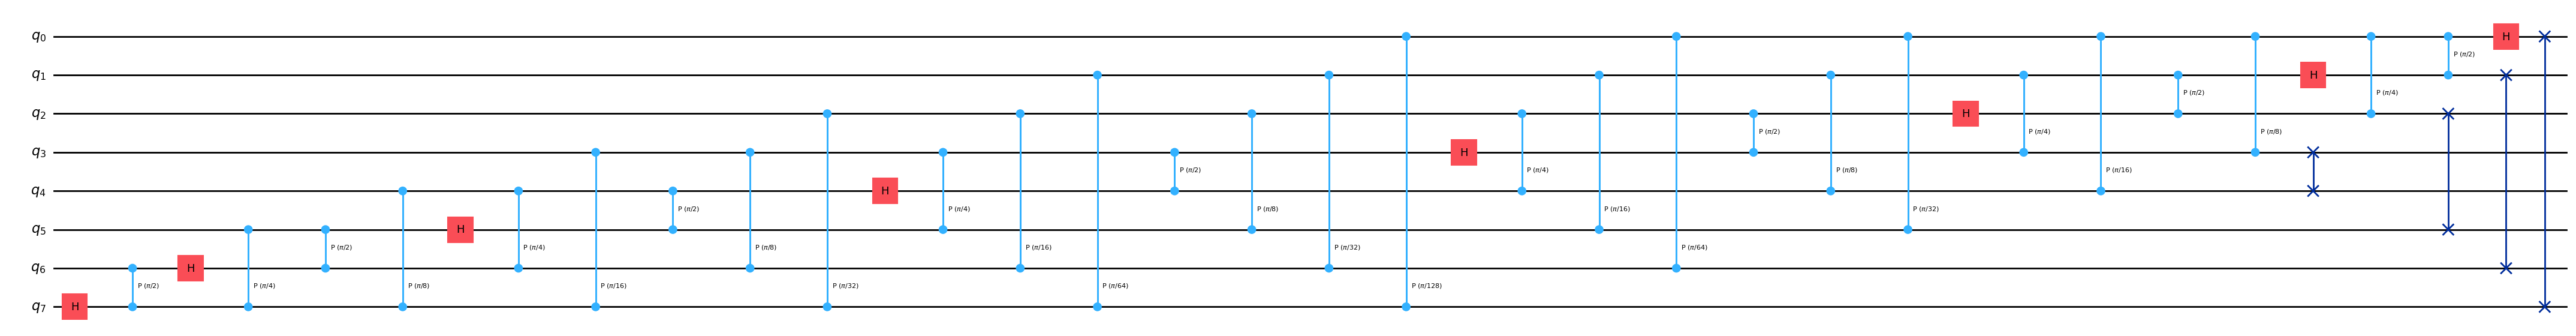

In [4]:
from qiskit import QuantumCircuit, transpile
from qiskit.transpiler import CouplingMap
from qiskit.circuit.library import QFT

num_qubits = 8
qft = QFT(num_qubits)

cmap = CouplingMap.from_ring(qft.num_qubits, bidirectional=True)
qft.decompose().draw('mpl', fold=-1, style='iqp')

In [5]:
def draw(circ):
    print(f'2-qubit depth: {circ.depth(lambda i: len(i.qubits) == 2)}')
    print(f'2-qubit size: {circ.size(lambda i: len(i.qubits) == 2)}')
    display(circ.draw('mpl', fold=-1))

2-qubit depth: 27
2-qubit size: 51


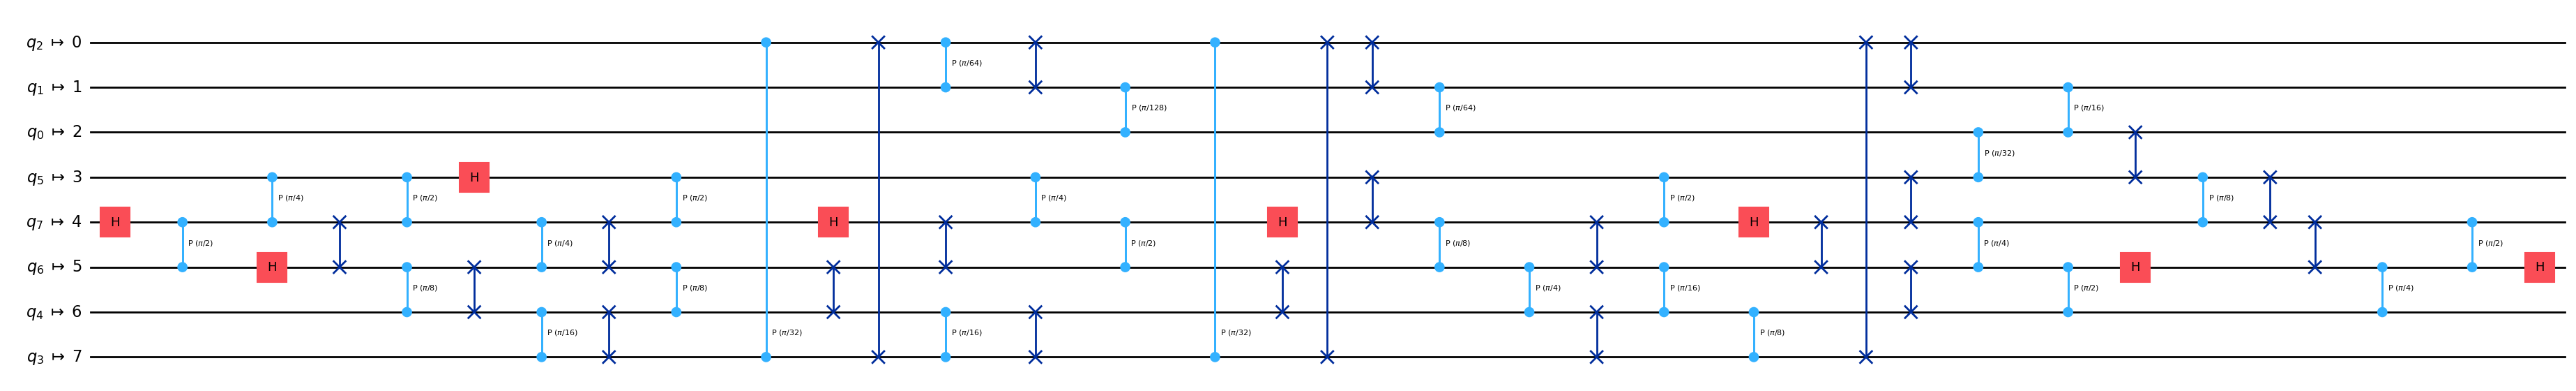

In [6]:
qft_m = transpile(qft, coupling_map=cmap, routing_method='sabre', optimization_level=2, seed_transpiler=5)
draw(qft_m)

2-qubit depth: 24
2-qubit size: 53


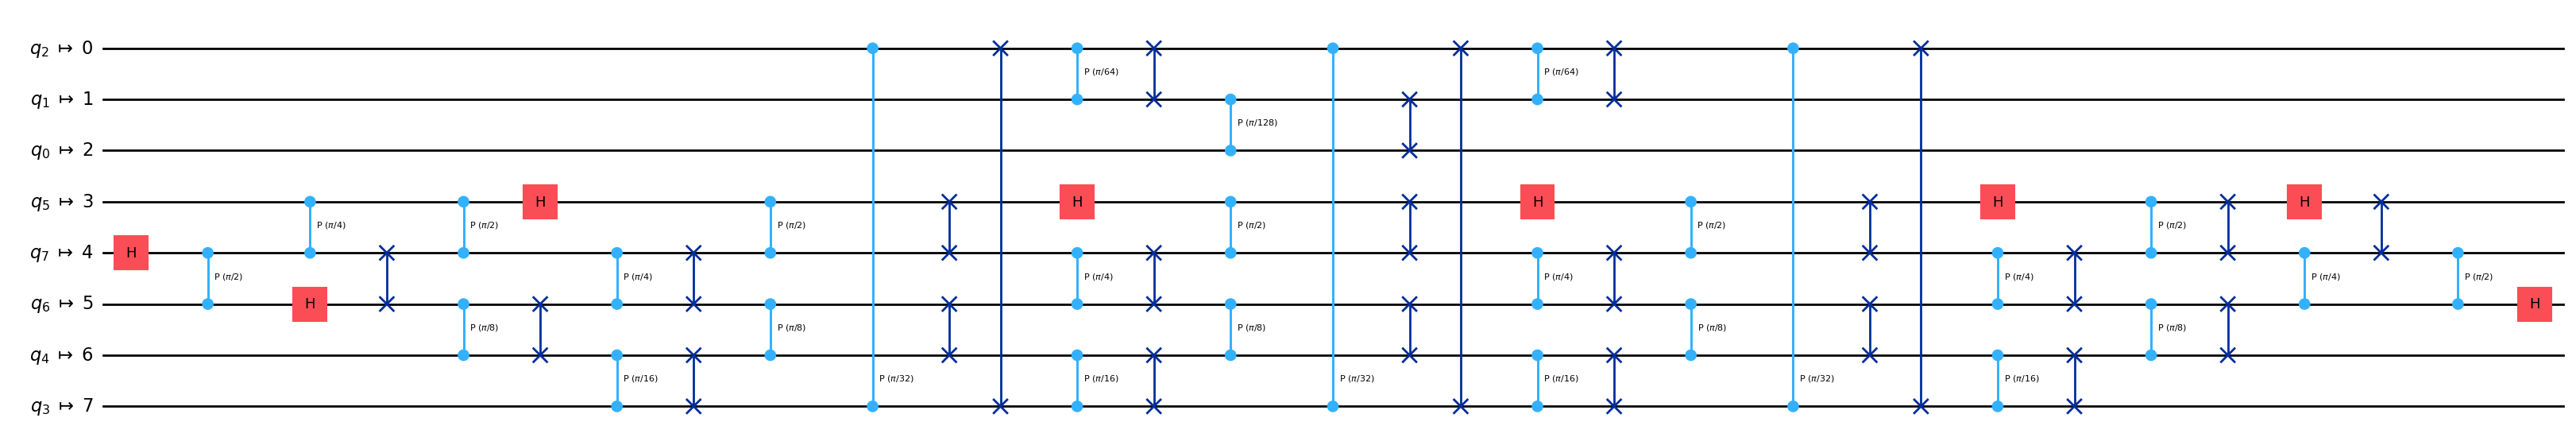

In [7]:
qft_m = transpile(qft, coupling_map=cmap, routing_method='stochastic', optimization_level=2, seed_transpiler=5)
draw(qft_m)

2-qubit depth: 27
2-qubit size: 52


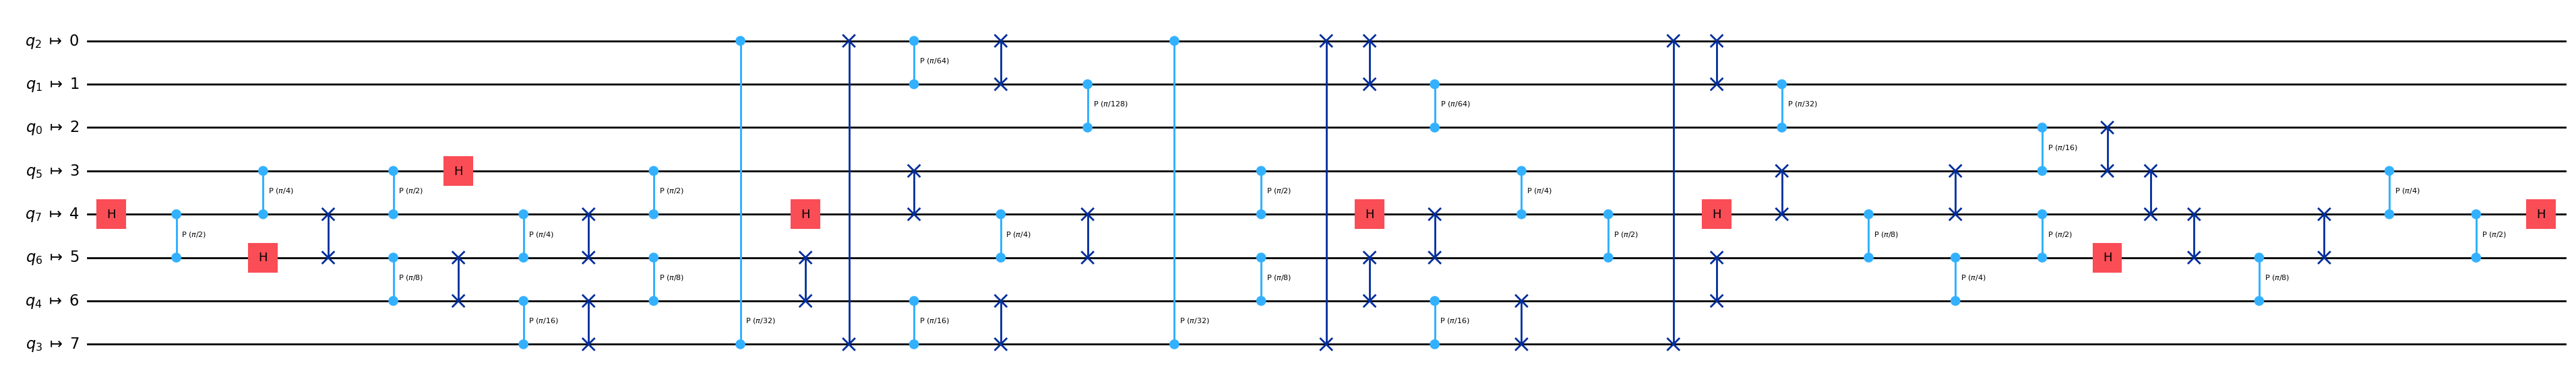

In [8]:
qft_m = transpile(qft, coupling_map=cmap, routing_method='lookahead', optimization_level=2, seed_transpiler=5)
draw(qft_m)

There are other plugins aimed at other stages of transpilation. For example the 'init' stage does initial transformations on the circuit, usually without regard to the target.

In [9]:
list_stage_plugins('init')

['qubit_reuse', 'qubit_reuse_dual', 'qubit_reuse_normal', 'default']

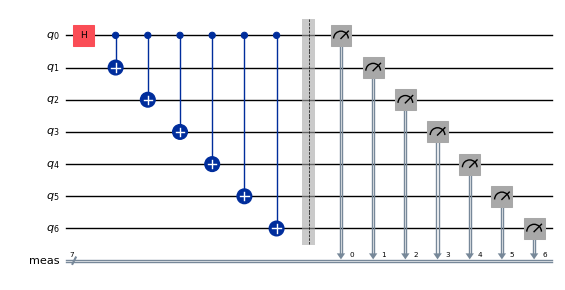

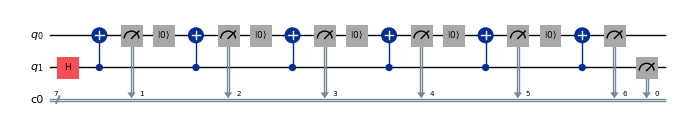

In [10]:
ghz = QuantumCircuit(7)
ghz.h(0)
ghz.cx(0, range(1, 7))
ghz.measure_all()
display(ghz.draw('mpl', scale=.5))

ghz_m = transpile(ghz, optimization_level=3, init_method="qubit_reuse")
display(ghz_m.draw('mpl', scale=.5))